# <center> Майнор "Интеллектуальный анализ данных" </center>

# <center> Курс "Введение в анализ данных" </center>

# <center> Алгоритмы KMeans и PAM </center>

## Table of contents  
  
1. [Настройка рабочей среды](#set)
2. [K_means](#kmeans)
    1. [Пример: Стажеры](#interns)
    2. [Число кластеров](#n_cluster)
    3. [Пример: MNIST](#mnist)
3. [Partition Around Medoids](#pam)
4. [Метрики](#metrics)

## Настройка рабочей среды <a name="set"></a>

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

# from matplotlib import style
# style.use('seaborn')

## K-means <a name="kmeans"></a>

Алгоритм k-means является центровым методом, т.е. разделение объектов на кластеры происходит таким образом, чтобы объекты скапливались вокруг центров кластеров. Центр кластера определяется как центр масс всех объектов кластера.   
При поиске оптимального разбиения алгоритм минимизирует сумму квадратов расстояний от объектов до центров их кластеров.  
Алгоритм kmeans работает только с Евклидовым расстоянием между объектами, т.к. только в  этом случае доказана сходимость алгоритма. 

### Пример: Стажеры <a name="interns"></a>

На предприятии имеется 14 стажеров. После первого месяца работы менеджеры оценивают стажеров по 4 критериям по 10-балльной шкале (от 0 до 9).

In [2]:
data = pd.read_csv("Interns.csv", 
                   delimiter=";", # разделитель значений столбцов в строке
                   encoding='windows-1251' # кодировка, т.к. названия столбцов кириллицей
                  )

In [3]:
data.head(100)

,Исполнительность,Аккуратность,Работа в команде,Креативность
0,1,0,1,1
1,8,7,6,8
2,4,3,5,4
3,6,8,7,8
4,6,8,8,7
5,4,3,5,3
6,7,6,8,6
7,3,4,3,5
8,0,1,1,1
9,5,4,4,4


Функция `KMeans()` из модуля `cluster` библиотеки `scikit-learn` создает объект с заданными параметрами алгоритма. Число кластеров `n_clusters` является обязательным параметром алгоритма.  
Чтобы обучить алгоритм, т.е. выполнить кластеризацию данных, необходимо вызвать метод `fit()`, которому передать данные.  
Документация [здесь](http://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html#sklearn.cluster.KMeans).

#### Хороший пример

In [4]:
from sklearn.cluster import KMeans

In [5]:
Z = KMeans(n_clusters = 3, # число кластеров
           init = 'random',
           n_init = 1,
           max_iter = 100, 
           random_state=15434,
          )
Z.fit(data)

KMeans(algorithm='auto', copy_x=True, init='random', max_iter=100, n_clusters=3,
       n_init=1, n_jobs=None, precompute_distances='auto', random_state=15434,
       tol=0.0001, verbose=0)

In [6]:
# координты центров кластеров
Z.cluster_centers_

array([[4.  , 3.5 , 4.25, 4.  ],
       [6.6 , 7.2 , 7.  , 7.  ],
       [0.6 , 0.4 , 1.  , 0.8 ]])

In [7]:
# метки кластеров для каждого объекта
Z.labels_

array([2, 1, 0, 1, 1, 0, 1, 0, 2, 0, 2, 1, 2, 2])

In [8]:
# Значение целевой функции: сумма квадратов расстояний от объекта до центра кластера, 
#                           к которому он принаджлежит
Z.inertia_

24.949999999999996

Добавим к данным координаты центров калстеров, чтобы отобразить их на графике.  
Чтобы не изменять исходные данные, создадим копию данных и будем работать с ней.

In [9]:
data_kmeans = data.copy() # shallow copy

centers = np.zeros((3, 4))
centers[:, 0:4] = Z.cluster_centers_
centers = pd.DataFrame(centers, columns=data_kmeans.columns)

data_kmeans['cluster'] = Z.labels_.astype(str)

centers['cluster'] = np.array(['c0', 'c1', 'c2']).astype(str)

centers

,Исполнительность,Аккуратность,Работа в команде,Креативность,cluster
0,4.0,3.5,4.25,4.0,c0
1,6.6,7.2,7.00,7.0,c1
2,0.6,0.4,1.00,0.8,c2


In [10]:
data_kmeans = data_kmeans.append(centers, ignore_index=True)
data_kmeans.head(20)

,Исполнительность,Аккуратность,Работа в команде,Креативность,cluster
0,1.0,0.0,1.00,1.0,2
1,8.0,7.0,6.00,8.0,1
2,4.0,3.0,5.00,4.0,0
3,6.0,8.0,7.00,8.0,1
4,6.0,8.0,8.00,7.0,1
5,4.0,3.0,5.00,3.0,0
6,7.0,6.0,8.00,6.0,1
7,3.0,4.0,3.00,5.0,0
8,0.0,1.0,1.00,1.0,2
9,5.0,4.0,4.00,4.0,0


Кластеризация оказалась успешкой, мы получили желаемые кластеры.  
Видим, что объекты кластеров скучковались вокрух своих центров. 

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_methods.py:140: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_methods.py:132: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


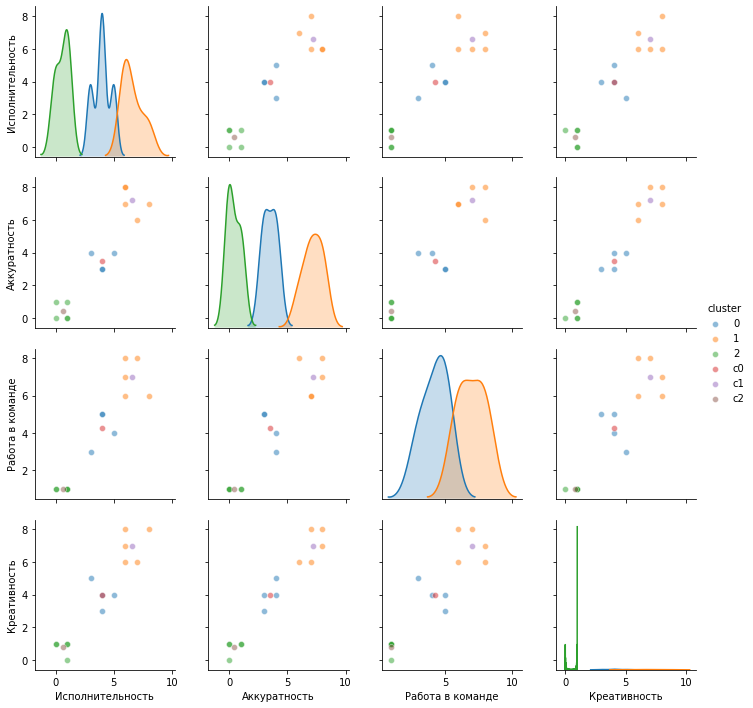

In [11]:
sns.pairplot(data_kmeans.sort_values('cluster'), 
             hue='cluster', 
             plot_kws={'alpha':0.5}, 
             vars=['Исполнительность', 
                   'Аккуратность',
                   'Работа в команде',
                   'Креативность']
            )
plt.show()

#### Плохой пример

Алгоритм k-means (точнее целый ряд алгоритмов, решающих эту задачу) является эвристическим, т.е. нет гарантий, что он найдет точное или даже хорошее решение. Он может свалиться в локальный оптимум.  
И решение алгоритма сильно зависит от выбора начальных центров кластеров.  
Как правило, начальные центры выбираются случайно из объектов данных (значение *random* параметра `init`).  
Есть более устойчивый метод выбора начальных центров - **k-means++** (является дефолтным в `KMeans()`). Он выбирает случайно только один центр, а оставшиеся подбирает по определенному правилу, подробнее в оригинальной статье: [link](http://ilpubs.stanford.edu:8090/778/1/2006-13.pdf), page 3 at the top

Посмотрим, какое решение найдет алгоритм при других случайно выбранных начальных центрах.  
Видим, что решение совсем плохое, и с точки зрения разбиения объектов, и по значению целевой функции.

In [12]:
Z = KMeans(n_clusters = 3, # число кластеров
           init = 'random',
           n_init = 1,
           max_iter = 100, 
           random_state=2,
          ).fit(data)
Z.inertia_

113.22222222222223

In [13]:
data_kmeans = data.copy()
data_kmeans['cluster'] = Z.labels_

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


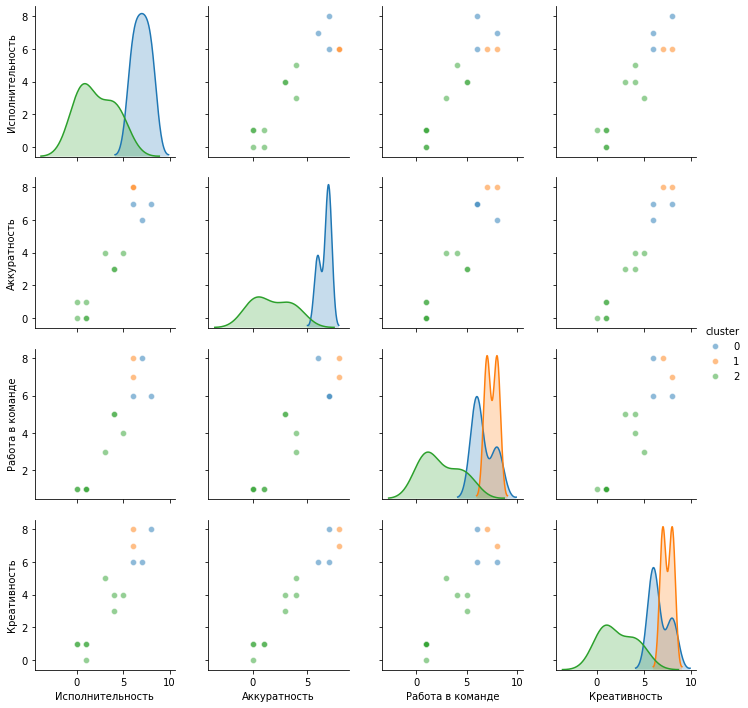

In [14]:
sns.pairplot(data_kmeans, 
             hue='cluster', 
             plot_kws={'alpha':0.5}, 
             vars=['Исполнительность', 
                   'Аккуратность',
                   'Работа в команде',
                   'Креативность']
            )
plt.show()

Чтобы компенсировать такую чувствительность алгоритма к начальным центрам, принято запускать алгоритм несколько раз с разными (случайными) начальными центрами, и выбирать то решение, при котором значение целевой функции наименьшее.  
Для этого в `KMeans()` есть параметр `n_init` - метод запустит алгоритм указанное число раз и верет наилучшее решение. 

Кроме того, на больших данных алгоритм может работать очень долго, пока не сойдется. Чтобы ограничить время выполнения, можно задать максимальное количество интарции - `max_iter` - после которого, если не успеет сойтись, он вернет текущее решение на этой итерации.  
Также есть параметр `tol` - минимальное изменение значения целевой функции, которое мы считаем значимым. 

### Число кластеров <a name="n_cluster"></a>

Для выбора числа кластеров стандартный подход такой: запустать алгоритм на различном числе кластером, далее локтевым методом выбрать подходящее число кластеров. 

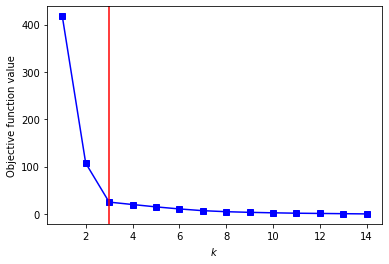

In [15]:
inertia = []
for k in range(1, data.shape[0]+1):
    Z = KMeans(n_clusters=k, 
               init = 'random',
               n_init = 100,
               max_iter = 1000).fit(data)
    inertia.append(Z.inertia_)

plt.plot(range(1, data.shape[0]+1), inertia, 'bo-', marker='s')
plt.xlabel('$k$')
plt.ylabel('Objective function value')
plt.axvline(x=3, c='r')
plt.show()

Эту точку можно также вычислить:

$$J(C) = \sum_{k=1}^K\sum_{i~\in~C_k} ||x_i - \mu_k|| \rightarrow \min\limits_C,$$

$$D(k) = \frac{|J(C_k) - J(C_{k+1})|}{|J(C_{k-1}) - J(C_k)|} \rightarrow \min\limits_k$$

In [16]:
inertia = np.sqrt(inertia)

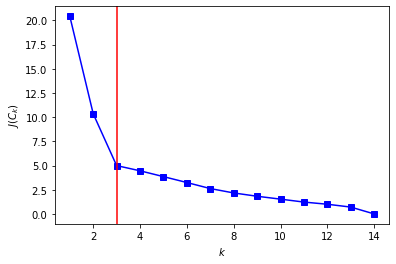

In [17]:
plt.plot(range(1, data.shape[0]+1), inertia, 'bo-', marker='s')
plt.xlabel('$k$')
plt.ylabel('$J(C_k)$')
plt.axvline(x=3, c='r')
plt.show()

### Пример: MNIST <a name="mnist"></a>

Рассмотрим применение kmeans на еще одном примере - наборе данных рукописных цифр [MNIST](http://yann.lecun.com/exdb/mnist/).

MNIST является одним из встроенных в `scikit-learn` наборов данных, он находится в модуле `datasets`.

In [1]:
from sklearn import datasets
digits = datasets.load_digits()
X = digits.data
y = digits.target

In [3]:
X

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

Каждый объект являет изображением $8\times8$ пикселей, содержащих информацию о цвете пикселя - оттенке серого.  Эти изобращения развернуты построчно в вектор из 64 значений - получается объект, который описывается 64 признаками-пикселями.  
Посмотрим на некоторые из них, вернув их к исходному виду:

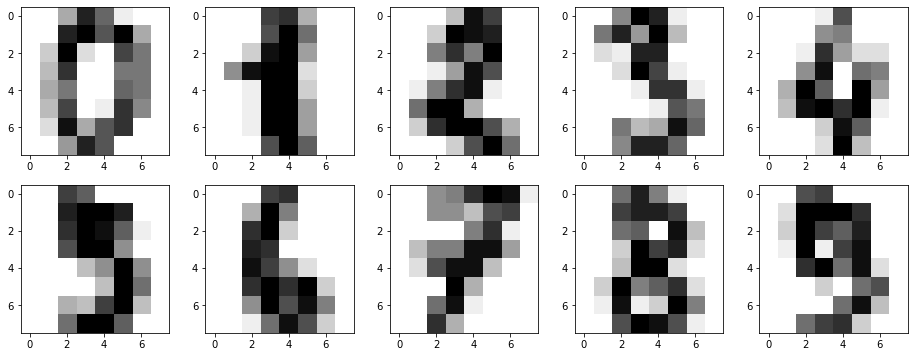

In [20]:
plt.figure(figsize=(16, 6))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(X[i,:].reshape([8,8]), cmap='gray_r');
plt.show()

Чтобы было удобнее визуализировать, воспользуемся одним из методов снижения размерности - `t-SNE`.  
Материалы для ознакомления:  [вот](http://datareview.info/article/algoritm-t-sne-illyustrirovannyiy-vvodnyiy-kurs/), [вот](https://habrahabr.ru/post/267041/) и [How to Use t-SNE Effectively](https://distill.pub/2016/misread-tsne/).

In [4]:
from sklearn.manifold import TSNE

In [5]:
%%time

tsne = TSNE(random_state=17)
X_tsne = tsne.fit_transform(X)

CPU times: user 52.1 s, sys: 2.38 s, total: 54.5 s
Wall time: 10.6 s


In [6]:
X_tsne

array([[ -5.827408  ,  57.91772   ],
       [ 19.99066   , -18.910654  ],
       [-12.128372  , -26.760605  ],
       ...,
       [  0.96222514, -12.340217  ],
       [-17.1574    ,   8.256496  ],
       [ -9.127002  , -14.491912  ]], dtype=float32)

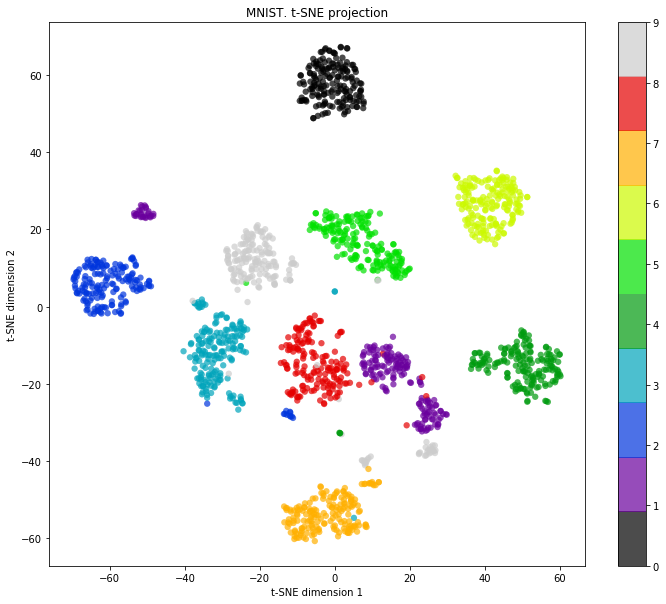

In [23]:
plt.figure(figsize=(12,10))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y, 
            edgecolor='none', alpha=0.7, s=40,
            cmap=plt.cm.get_cmap('nipy_spectral', 10))
plt.colorbar()
plt.xlabel("t-SNE dimension 1")
plt.ylabel("t-SNE dimension 2")
plt.title('MNIST. t-SNE projection')
plt.show()

А теперь применим kmeans к этим данных. Сразу укажем 10 кластеров.  
**NB:** Мы кластеризуем оригинальные данные. Сжатые данные, полученные от t-SNE, используем только для визуализации. 

In [11]:
from sklearn.cluster import KMeans

In [16]:
%%time

Z_mnist = KMeans(n_clusters = 10, # число кластеров
                 init = 'random',
                 n_init = 10,
                 max_iter = 100,
                ).fit(X)

CPU times: user 778 ms, sys: 125 ms, total: 903 ms
Wall time: 205 ms


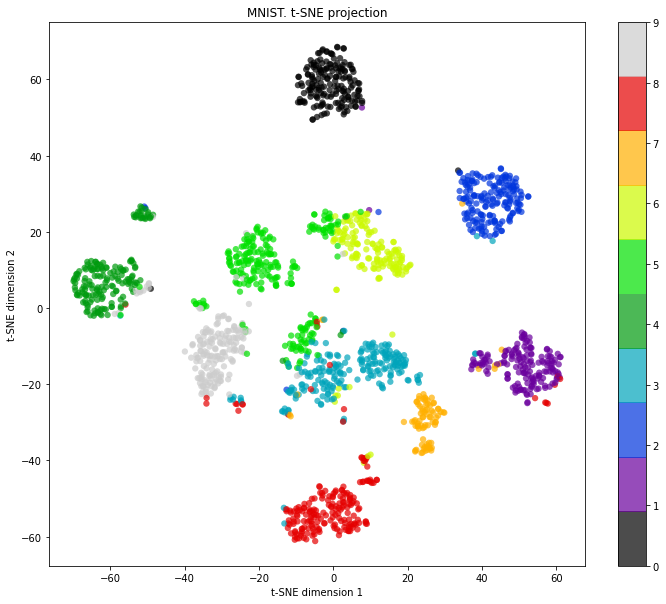

In [17]:
from matplotlib import pyplot as plt
plt.figure(figsize=(12,10))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=Z_mnist.labels_, 
            edgecolor='none', alpha=0.7, s=40,
            cmap=plt.cm.get_cmap('nipy_spectral', 10))
plt.colorbar()
plt.xlabel("t-SNE dimension 1")
plt.ylabel("t-SNE dimension 2")
plt.title('MNIST. t-SNE projection')
plt.show()

Посмотрим, насколько кластеры соответствуют исходному разбиению:

In [26]:
pd.crosstab(y,
            Z_mnist.labels_, 
            rownames=['digit'],
            colnames=['cluster'])

cluster,0,1,2,3,4,5,6,7,8,9
digit,,,,,,,,,,
0,0,0,177,0,0,1,0,0,0,0
1,0,0,0,1,1,0,99,2,55,24
2,4,2,1,0,13,0,8,0,2,147
3,7,13,0,2,154,0,7,0,0,0
4,10,0,0,0,0,162,2,0,7,0
5,0,42,0,136,1,2,0,1,0,0
6,0,0,1,0,0,0,2,177,1,0
7,175,0,0,0,0,0,2,0,2,0
8,5,52,0,4,2,0,100,2,6,3


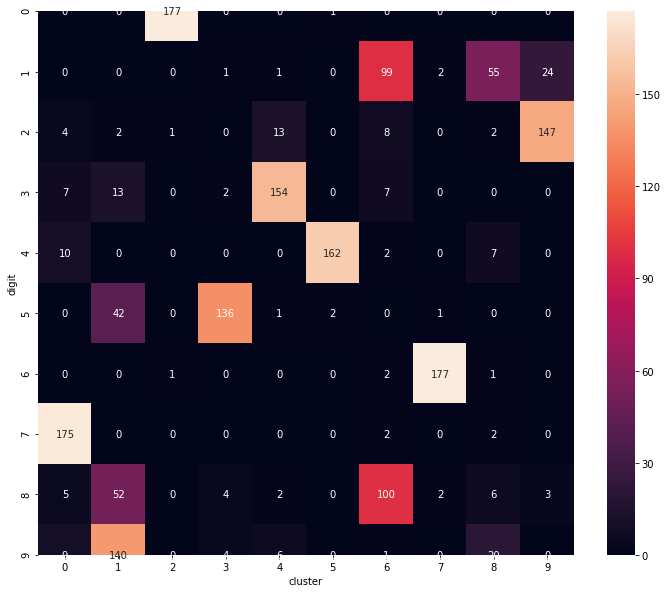

In [27]:
plt.figure(figsize=(12, 10))
sns.heatmap(pd.crosstab(y,
                        Z_mnist.labels_, 
                        rownames=['digit'],
                        colnames=['cluster']),
            annot=True, 
            fmt='.5g')
plt.show()

Отдельный интерес в кластеризации, особенно при применении центровых методов, представляют центры кластеров.  
По сути, и по способу вычисления, центры кластеров являются усреднением всех объектов внутри кластера. Если кластеры однородные, т.е. большинство объектов в них действительно обладают схожими характеристиками, то центр кластера представляет из себя вполне репрезентативный объект, который может быть использован в дальнейшем анализе.  
Например, посмотрим на центры кластеров для рукописных цифр:

In [27]:
Z_mnist.n_iter_

33

In [20]:
Z_mnist.cluster_centers_

array([[ 0.00000000e+00,  2.23463687e-02,  4.22905028e+00,
         1.31396648e+01,  1.12681564e+01,  2.93854749e+00,
         3.35195531e-02, -5.55111512e-17,  2.60208521e-18,
         8.82681564e-01,  1.26201117e+01,  1.33687151e+01,
         1.14078212e+01,  1.13687151e+01,  9.60893855e-01,
        -1.38777878e-17,  1.30104261e-18,  3.72625698e+00,
         1.42122905e+01,  5.25139665e+00,  2.10614525e+00,
         1.21173184e+01,  3.53072626e+00, -1.38777878e-17,
        -2.16840434e-19,  5.29608939e+00,  1.26424581e+01,
         2.03351955e+00,  2.29050279e-01,  9.07821229e+00,
         6.47486034e+00, -4.33680869e-19,  0.00000000e+00,
         5.88268156e+00,  1.14916201e+01,  8.65921788e-01,
         3.35195531e-02,  8.81005587e+00,  7.15083799e+00,
         0.00000000e+00, -1.73472348e-18,  3.51396648e+00,
         1.32849162e+01,  1.65921788e+00,  1.49162011e+00,
         1.13519553e+01,  5.84357542e+00,  3.46944695e-18,
         8.67361738e-19,  8.04469274e-01,  1.31117318e+0

In [26]:
A[1,:].reshape([8,8])

array([[ 0.00000000e+00,  5.55111512e-17,  2.87425150e-01,
         7.03592814e+00,  1.20000000e+01,  1.95209581e+00,
         1.49700599e-01,  5.38922156e-02],
       [ 1.73472348e-18,  1.19760479e-02,  3.20958084e+00,
         1.37185629e+01,  8.56886228e+00,  1.49101796e+00,
         9.70059880e-01,  3.17365269e-01],
       [ 8.67361738e-19,  6.22754491e-01,  1.05868263e+01,
         1.16586826e+01,  4.34131737e+00,  5.18562874e+00,
         3.91017964e+00,  3.53293413e-01],
       [ 5.98802395e-03,  4.70059880e+00,  1.47365269e+01,
         5.95808383e+00,  6.82035928e+00,  1.07904192e+01,
         6.27544910e+00,  1.79640719e-02],
       [ 0.00000000e+00,  8.91616766e+00,  1.48263473e+01,
         9.38323353e+00,  1.28023952e+01,  1.44071856e+01,
         5.46706587e+00,  0.00000000e+00],
       [ 9.58083832e-02,  6.42514970e+00,  1.15508982e+01,
         1.22335329e+01,  1.47784431e+01,  1.08622754e+01,
         1.58682635e+00,  0.00000000e+00],
       [ 5.98802395e-02,  1.107784

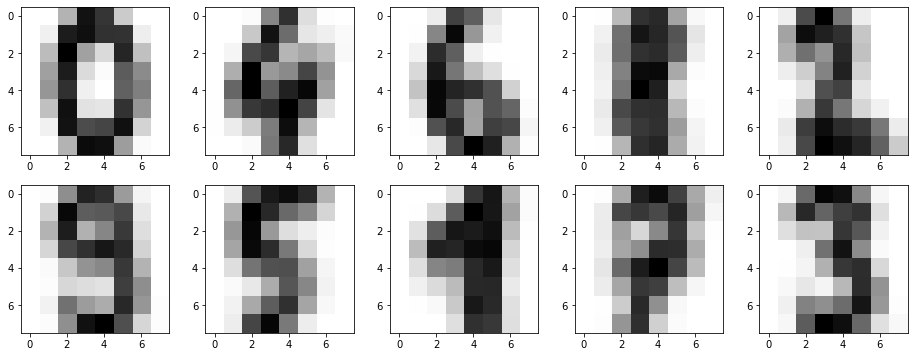

In [23]:
A = Z_mnist.cluster_centers_

plt.figure(figsize=(16, 6))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(A[i,:].reshape([8,8]), cmap='gray_r');
plt.show()